## 匯入套件

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

## 開始爬蟲
- 標的網站：PPTBrain (https://www.pttbrain.com/)
- 說明：
我們透過開發者工具找到api，觀察網址變化後，修改網址最後面的限制文章數量，以及起始爬取文章。

例如："posts?limit=100&offset=0"

limit是文章顯示的數量，而offset則是從第幾篇開始顯示：總共顯示100篇文章，從第1篇開始顯示（從0開始計數）

**示意圖：**
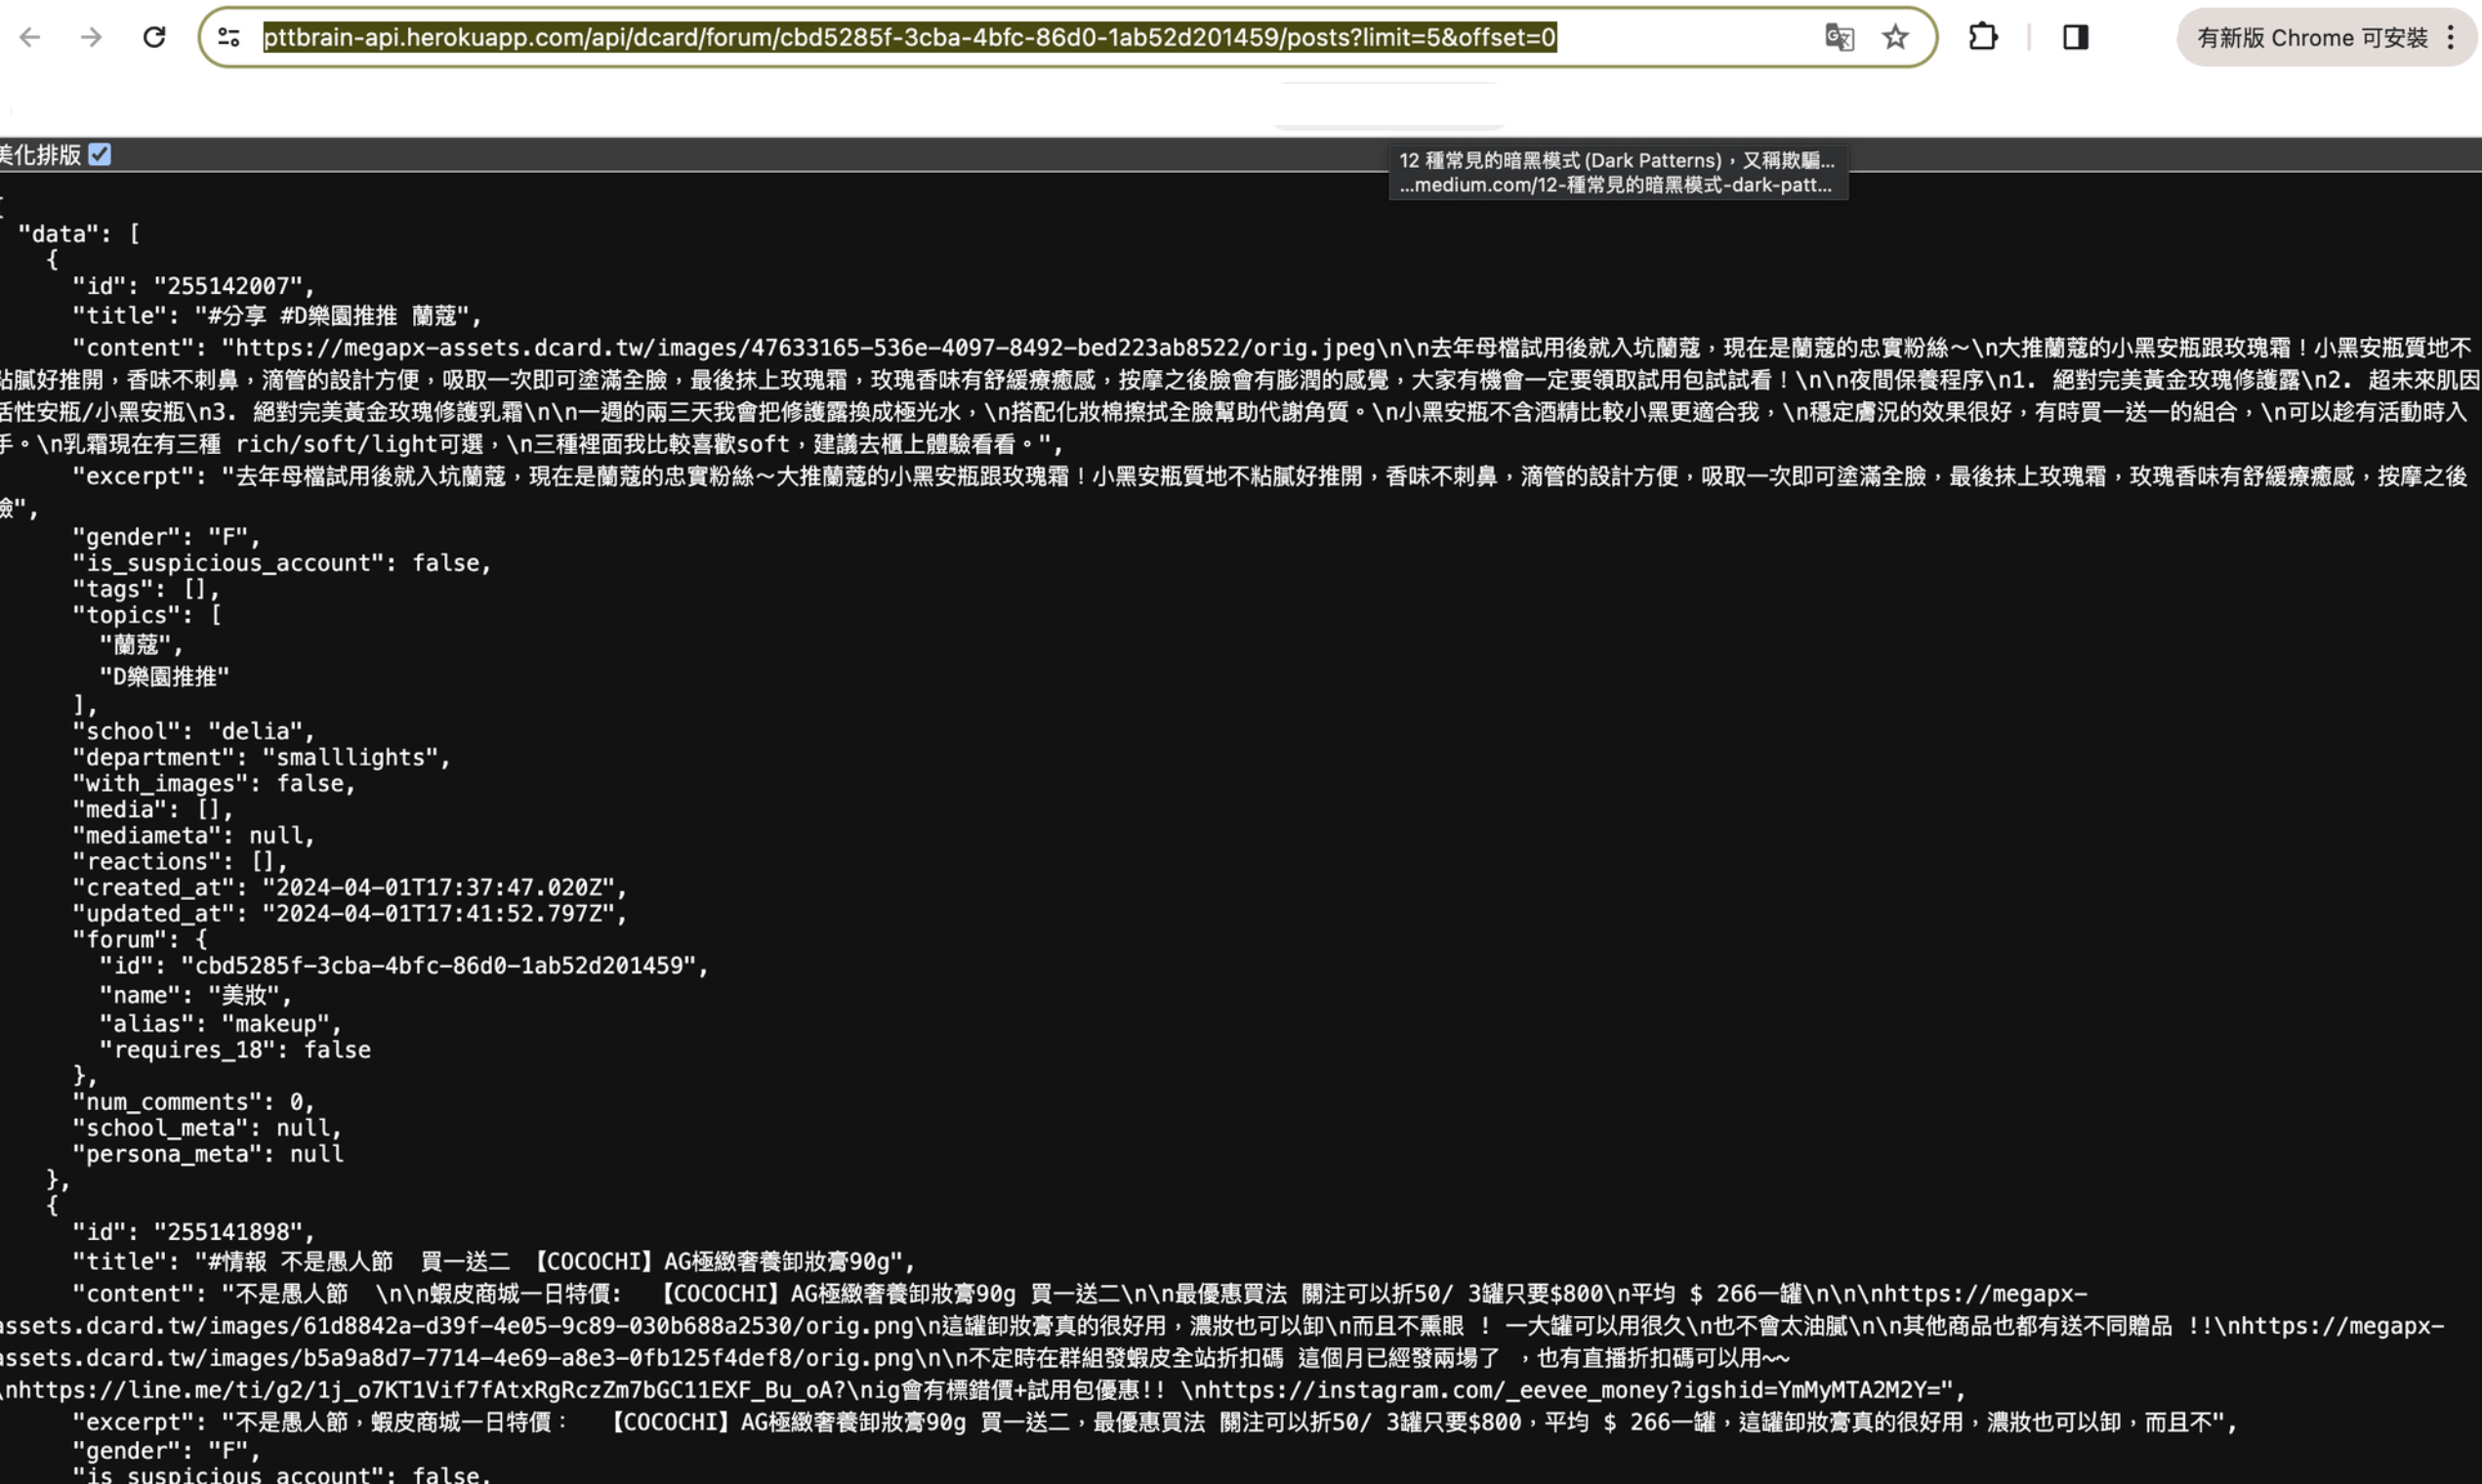

In [ ]:
url = 'https://pttbrain-api.herokuapp.com/api/dcard/forum/cbd5285f-3cba-4bfc-86d0-1ab52d201459/posts?limit=100&offset=0'


response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    divs = soup.find_all('div', {'class': 'ui large animated divided selection relaxed list'})

    for div in divs:
        print(div.text)
else:
    print('請求失敗')


In [ ]:
soup

{"data":[{"id":"255204670","title":"#分享 蘭芝粉澎潤睡美人晚安面膜 #卡友D樂園","content":"*本篇為Dcard官方合作文章\n\n嗨嗨～各位卡友安安啊🌟\n#D樂園好禮推薦 的蘭芝專屬大使本人我要來分享蘭芝最新的好物囉！🥰\n就是這款 #粉澎潤睡美人晚安面膜 讓你越睡越彈嫩💆🏻‍♀️\n\nhttps://megapx-assets.dcard.tw/images/b9dd0849-4fc7-48dd-b537-7b4cd107fd62/orig.jpeg\n\n一上市我的美妝隊小夥伴就馬上傳line給我表示很期待！！😍\n不愧是有加入蘭芝官方line的狂熱粉絲 消息粉靈通啦💯\n而且你們知道嗎🧏🏻‍♀️ 「LANEIGE」是法文中的「雪」的意思喔！！\n象徵著讓女性都能擁有如白雪般飽水淨透無肌膚🌬️好浪漫餒\n\nhttps://megapx-assets.dcard.tw/images/69404c3e-5dde-452e-937e-1c2b05d0d2ba/orig.jpeg\n\n他們家一直以來非常有名的就是晚安唇膜跟晚安面膜\n唇膜更是我去韓國必回購的商品！我每晚都會擦🤩愛爆\n而這次的 #粉澎潤 主打在睡眠時間放鬆的為肌膚充飽電\n賦予疲憊肌膚生機和緊緻彈性💗\n非常適合*｡ﾟ睡眠不足*｡ﾟ表情豐富*｡ﾟ疲勞缺水的人唷（就是本人我🫣\n我實測快一週 已經覺得有感 臉皮子ㄉㄨㄞㄉㄨㄞ的\n大家看照片都看得出來吧😙😝\nhttps://megapx-assets.dcard.tw/images/a31b8a37-88e5-4ca3-a9ad-8dfe80d519e4/orig.jpeg\n\n\n一早起床的樣子⬇️\nhttps://megapx-assets.dcard.tw/images/83f94135-596b-4392-a371-81b6b5256f97/orig.jpeg\n\n而且擦上去香香的整個心情都療癒起來 他有一種沈靜的花香 感覺像是水仙或睡蓮那種很仙女的味道✨\n一查果然 小粉瓶的主成分就是愛茉莉太平洋獨家研發的「牡丹膠原蛋白複合物™」\n選自韓國牡丹花的花瓣及根 將花瓣碾碎及根部火烤後並靜置於水中一晚 提煉出的「牡丹花萃取」 感覺很厲害～！🪷\n裡面還有45,00顆透光水微囊 抹開瞬

In [ ]:
type(soup)

bs4.BeautifulSoup

In [ ]:
json_data_str = soup.text

# 解析JSON數據
parsed_json = json.loads(json_data_str)

In [ ]:
json_data_str

'{"data":[{"id":"255204670","title":"#分享 蘭芝粉澎潤睡美人晚安面膜 #卡友D樂園","content":"*本篇為Dcard官方合作文章\\n\\n嗨嗨～各位卡友安安啊🌟\\n#D樂園好禮推薦 的蘭芝專屬大使本人我要來分享蘭芝最新的好物囉！🥰\\n就是這款 #粉澎潤睡美人晚安面膜 讓你越睡越彈嫩💆🏻\u200d♀️\\n\\nhttps://megapx-assets.dcard.tw/images/b9dd0849-4fc7-48dd-b537-7b4cd107fd62/orig.jpeg\\n\\n一上市我的美妝隊小夥伴就馬上傳line給我表示很期待！！😍\\n不愧是有加入蘭芝官方line的狂熱粉絲 消息粉靈通啦💯\\n而且你們知道嗎🧏🏻\u200d♀️ 「LANEIGE」是法文中的「雪」的意思喔！！\\n象徵著讓女性都能擁有如白雪般飽水淨透無肌膚🌬️好浪漫餒\\n\\nhttps://megapx-assets.dcard.tw/images/69404c3e-5dde-452e-937e-1c2b05d0d2ba/orig.jpeg\\n\\n他們家一直以來非常有名的就是晚安唇膜跟晚安面膜\\n唇膜更是我去韓國必回購的商品！我每晚都會擦🤩愛爆\\n而這次的 #粉澎潤 主打在睡眠時間放鬆的為肌膚充飽電\\n賦予疲憊肌膚生機和緊緻彈性💗\\n非常適合*｡ﾟ睡眠不足*｡ﾟ表情豐富*｡ﾟ疲勞缺水的人唷（就是本人我\U0001fae3\\n我實測快一週 已經覺得有感 臉皮子ㄉㄨㄞㄉㄨㄞ的\\n大家看照片都看得出來吧😙😝\\nhttps://megapx-assets.dcard.tw/images/a31b8a37-88e5-4ca3-a9ad-8dfe80d519e4/orig.jpeg\\n\\n\\n一早起床的樣子⬇️\\nhttps://megapx-assets.dcard.tw/images/83f94135-596b-4392-a371-81b6b5256f97/orig.jpeg\\n\\n而且擦上去香香的整個心情都療癒起來 他有一種沈靜的花香 感覺像是水仙或睡蓮那種很仙女的味道✨\\n一查果然 小粉瓶的主成分就是愛茉莉太平洋獨家研發的「牡丹膠原蛋白複合物™」\\n選自韓國牡丹花的花瓣及根 將花瓣碾碎及根部火烤後

In [ ]:
type(parsed_json)

dict

In [ ]:
df = pd.DataFrame(parsed_json['data'])
df

,id,title,content,excerpt,gender,is_suspicious_account,tags,topics,school,department,with_images,media,mediameta,reactions,created_at,updated_at,forum,num_comments,school_meta,persona_meta
0,255204670,#分享 蘭芝粉澎潤睡美人晚安面膜 #卡友D樂園,*本篇為Dcard官方合作文章\n\n嗨嗨～各位卡友安安啊🌟\n#D樂園好禮推薦 的蘭芝專屬...,*本篇為Dcard官方合作文章，嗨嗨～各位卡友安安啊🌟，#D樂園好禮推薦 的蘭芝專屬大使本人...,F,False,[],"[官方合作, D樂園好禮推薦, 粉澎潤睡美人晚安面膜, 蘭芝, 越睡越彈嫩]",貓科的𝐑𝐨𝐱𝐚𝐧𝐧𝐞,enchanted1004,False,[],None,[],2024-04-08T17:36:32.160Z,2024-04-08T17:36:32.160Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,None
1,255204666,#分享 代購資生堂水油平衡水凝霜,有人需要幫忙代購嗎 個人覺得蠻好用的長這樣\nhttps://megapx-assets.d...,有人需要幫忙代購嗎 個人覺得蠻好用的長這樣，我都拿來睡前跟妝前用 妝前用可以讓底妝更服貼 也...,F,False,[],"[代購, 資生堂, 保養品, 底妝]",C,chen_cat1011,False,[],None,[{'id': 'aa0d425f-d530-4478-9a77-fe3aedc79eea'...,2024-04-08T17:36:12.022Z,2024-04-08T17:38:32.812Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,None
2,255204618,面膜控的3瓶精華水評比📝 Armani粉水、青春露、原生露,本人是超級面膜控！尤其愛面膜紙+精華水的濕敷方法\n可以自行控制用量這點很棒\n最近也看到很...,本人是超級面膜控！尤其愛面膜紙+精華水的濕敷方法，可以自行控制用量這點很棒，最近也看到很多人...,F,False,[],[],元智大學,None,False,[],None,[{'id': '286f599c-f86a-4932-82f0-f5a06f1eca03'...,2024-04-08T17:30:50.802Z,2024-04-08T17:30:50.802Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,"{'id': '03dccf8c-1c04-4bde-ab9d-35117fa57550',...",None
3,255204391,桃園新光三越mac櫃姐,https://megapx-assets.dcard.tw/images/e2005b38...,這樣罵人合理嗎？？上次也發了一個客人消費沒讓他滿意 這個櫃姐也是一頓臭罵 罵客人破給女人！,F,False,[],"[桃園, 新光, mac]",新生醫護管理專科學校,None,False,[],None,[{'id': '286f599c-f86a-4932-82f0-f5a06f1eca03'...,2024-04-08T17:03:40.950Z,2024-04-08T17:11:02.220Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,"{'id': '2e70f1e5-44f1-4de7-8145-c21bb747cedc',...",None
4,255204344,#請益 想請問關於Aveda的臉部保養品的問題,由於版上關於Aveda的臉部保養討論甚少\n想請問Aveda的臉部保養品塗抹後的整體感覺會是...,由於版上關於Aveda的臉部保養討論甚少，想請問Aveda的臉部保養品塗抹後的整體感覺會是怎...,M,False,[],[],卡特勒,jay_cutler,False,[],None,[],2024-04-08T16:58:56.383Z,2024-04-08T16:58:56.383Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,255194451,#分享 最近用到的好東西aka空空賞,https://megapx-assets.dcard.tw/images/83f53111...,最近連假剛好有時間來整理房間，選出幾個我個人很喜歡的東西跟大家分享🥳，1️⃣SUNGBOON...,F,False,[],"[空空, 保養, 推薦]",誰在到處睡覺,sunshinehobi,False,[],None,[{'id': '286f599c-f86a-4932-82f0-f5a06f1eca03'...,2024-04-07T16:28:54.425Z,2024-04-07T16:41:13.095Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,"{'id': 'sunshinehobi', 'nickname': '大明湖畔鄭太太'}"
96,255194382,求西屯/西區/一中美睫店推薦,來台中讀書都找不到適合的美睫店\n本人一單一雙（有點難接 平常都接濃密款式）\n價格範圍可以...,來台中讀書都找不到適合的美睫店，本人一單一雙（有點難接 平常都接濃密款式），價格範圍可以15...,F,False,[],"[西屯, 西區, 推薦, 睫毛, 美妝]",逢甲大學,None,False,[],None,[],2024-04-07T16:19:24.753Z,2024-04-07T16:19:24.753Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,"{'id': '755a0384-4a42-4dc0-a587-226dc95b0c2e',...",None
97,255194338,banila蜜粉購買？？,hihi\n我是大油肌\n終於決定要買banila米粉了\n要請問大家\nbanila 蜜粉...,hihi，我是大油肌，終於決定要買banila米粉了，要請問大家，banila 蜜粉都去那買...,F,False,[],[],無言,shain0209,False,[],None,[],2024-04-07T16:13:19.992Z,2024-04-07T16:13:19.992Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,None
98,255194284,Re: RICA 熱蠟除毛保養品牌,此篇文章為轉貼文章，請更新至最新版本觀看完整內容。,,F,False,[],"[熱蠟, 保養, 品牌]",Eva Hsieh🌸,evahsieh0724,False,[],None,[],2024-04-07T16:05:13.809Z,2024-04-07T16:05:13.809Z,"{'id': 'cbd5285f-3cba-4bfc-86d0-1ab52d201459',...",0,None,None


- 文章網址：https://pttbrain-api.herokuapp.com/api/dcard/post/255201680

- 只要修改後面的ID(255201680) 就可以進入其他文章
- 'https://pttbrain-api.herokuapp.com/api/dcard/post/' + ID

## 將檔案儲存成excel檔
後續再進行標記任務

In [ ]:
df.to_excel('output.xlsx')

#### PTTBrain的Dcard區爬不下來了（2024.5.14）